<a href="https://colab.research.google.com/github/mariotko9/aprendizado_de_maquina/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# ============================================================
# 📌 Instalação e Imports
# ============================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Visualização inicial dos dados:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


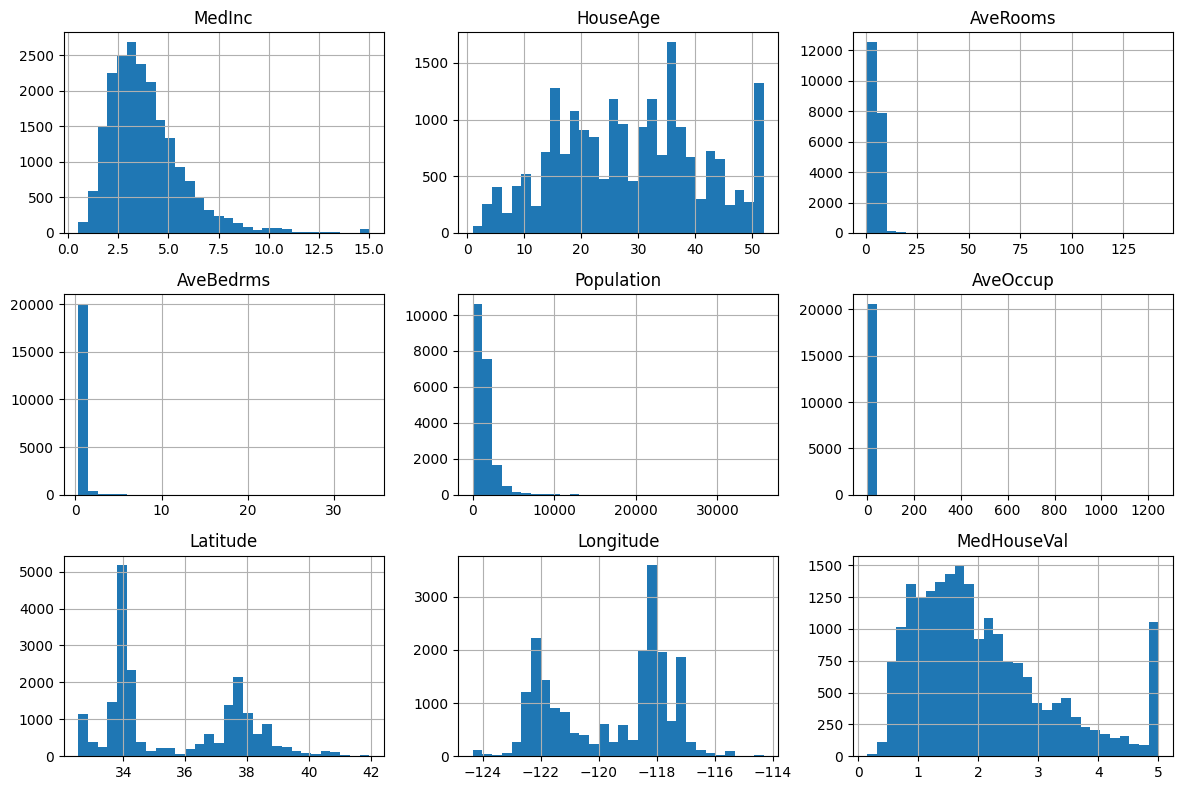

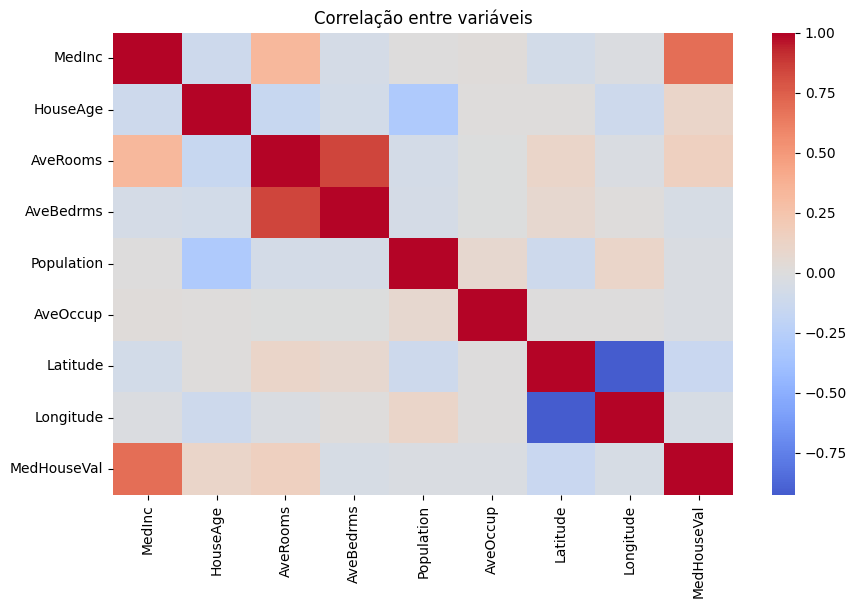

In [29]:
# ============================================================
# 📌 Carregando o Dataset California Housing (Censo 1990)
# ============================================================

# O dataset já está disponível no scikit-learn
data = fetch_california_housing(as_frame=True)
df = data.frame

print("Visualização inicial dos dados:")
print(df.head())

# Histogramas
df.hist(figsize=(12,8), bins=30)
plt.tight_layout(); plt.show()

# Correlação
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0, annot=False)
plt.title('Correlação entre variáveis'); plt.show()

In [24]:
# ============================================================
# 📌 Pré-processamento dos dados
# ============================================================

# Selecionamos as variáveis de interesse
features = ['MedInc','HouseAge','AveRooms','AveBedrms',
            'Population','AveOccup','Latitude','Longitude']

X = df[features].copy()

# Padronizamos os dados (média=0, desvio=1) para evitar distorções
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

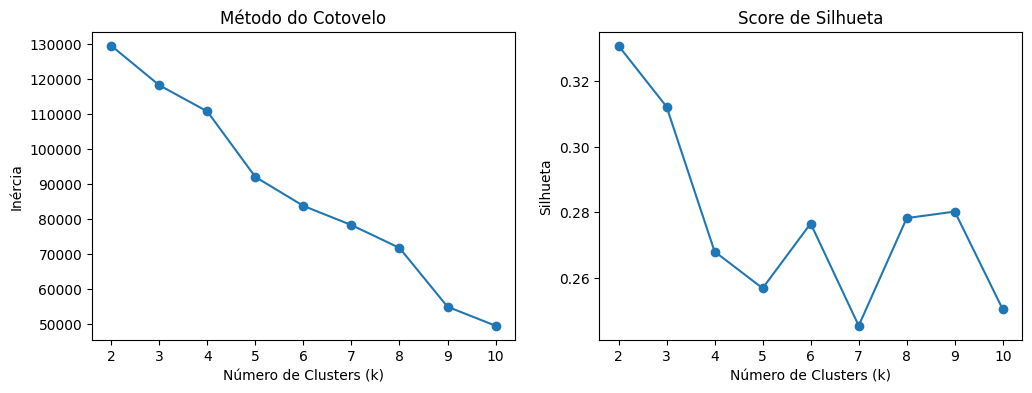

In [25]:
# ============================================================
# 📌 Escolha do número de clusters (Método do Cotovelo + Silhueta)
# ============================================================

inertias, silhouettes, ks = [], [], range(2,11)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertias.append(km.inertia_)  # Soma dos erros quadráticos
    silhouettes.append(silhouette_score(X_scaled, km.labels_))  # Qualidade da separação

# Plotando os gráficos
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(list(ks), inertias, marker='o')
ax[0].set_title('Método do Cotovelo')
ax[0].set_xlabel('Número de Clusters (k)')
ax[0].set_ylabel('Inércia')

ax[1].plot(list(ks), silhouettes, marker='o')
ax[1].set_title('Score de Silhueta')
ax[1].set_xlabel('Número de Clusters (k)')
ax[1].set_ylabel('Silhueta')

plt.show()

In [26]:
# ============================================================
# 📌 Definição do número final de clusters
# ============================================================

# Exemplo: suponhamos que k=4 seja um bom equilíbrio
k_final = 4
km = KMeans(n_clusters=k_final, random_state=42, n_init='auto')
labels = km.fit_predict(X_scaled)

# Adicionamos os rótulos ao DataFrame original
df['cluster'] = labels

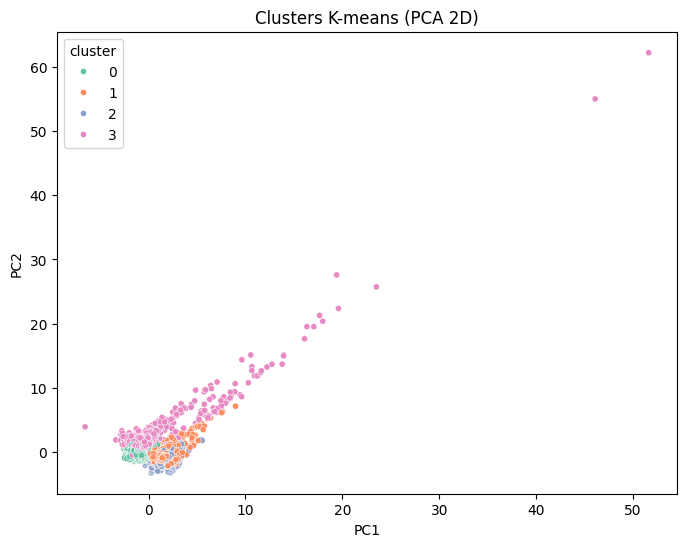

In [27]:
# ============================================================
# 📌 Visualização dos clusters com PCA (redução para 2D)
# ============================================================

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pcadf = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pcadf['cluster'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=pcadf, x='PC1', y='PC2', hue='cluster',
                palette='Set2', s=20)
plt.title('Clusters K-means (PCA 2D)')
plt.show()

In [28]:
# ============================================================
# 📌 Perfil médio de cada cluster
# ============================================================

print("Médias das variáveis por cluster:")
print(df.groupby('cluster')[features].mean().round(2))


Médias das variáveis por cluster:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
cluster                                                                
0          3.21     32.29      4.69       1.06     1337.99      3.08   
1          4.00     18.48      5.76       1.10     1561.99      2.86   
2          3.45     41.15      5.16       1.06      965.64      2.71   
3          6.02     18.26      7.28       1.23     2027.12      3.78   

         Latitude  Longitude  
cluster                       
0           33.97    -118.05  
1           37.94    -121.53  
2           37.92    -121.94  
3           34.01    -117.97  


**Interpretação dos Clusters**

Exemplo com k=4 Cluster 0 Áreas Urbanas de Alta Renda
Renda mediana (MedInc): acima da média do estado.

Latitude/Longitude: geralmente próximas à costa (ex.: região de Los Angeles ou San Francisco).
Insight: representam bairros valorizados, com maior poder aquisitivo e imóveis mais caros.

Cluster 1 Bairros Populares e Densamente Povoado
População: alta densidade, muitas pessoas por domicílio.
AveRooms / AveBedrms: número médio de quartos menor.
Insight: áreas de habitação mais compacta, possivelmente regiões urbanas periféricas ou conjuntos habitacionais.

Cluster 2 Regiões Rurais ou Menos Populosas
População: baixa densidade.
Latitude/Longitude: mais afastadas da costa, interior do estado.
HouseAge: casas mais antigas em média.
Insight: áreas rurais ou pequenas cidades, com menor pressão imobiliária.

Cluster 3 Zonas de Expansão Residencial
HouseAge: casas mais novas.
AveRooms: maior número médio de cômodos.
Insight: regiões em crescimento, com construções recentes e perfil de famílias maiores.
